In [1]:
import os
import matplotlib.pyplot as plt

plt.style.use('default')

from common.utils import get_execution_times, visualize_execution_times, visualize_execution_times_two_plots

save_figures = True
plot_formats = ["png", "pdf"]
plot_folder = "./plots/analysis"

time_plot_kw = {'aspect': 2.5, 'dpi': 140, 'first_is_baseline': True, 'stats_table_bbox': (0.02, 0.5, 0.2, 0.32)}
comp_plot_kw = {'aspect': 2, 'dpi': 120, 'hspace': 0.15}

LP_plot_kw = {'dpi': 110, 'first_is_baseline': True, 'stats_table_bbox': (0.02, 0.5, 0.2, 0.32)}

if not os.path.isdir(plot_folder):
    os.makedirs(plot_folder)

#reloads external modules when they are changed
%load_ext autoreload
%autoreload 2

# CP
performance analysis of the strip packing problem using Constraint Programming

## No Rotation

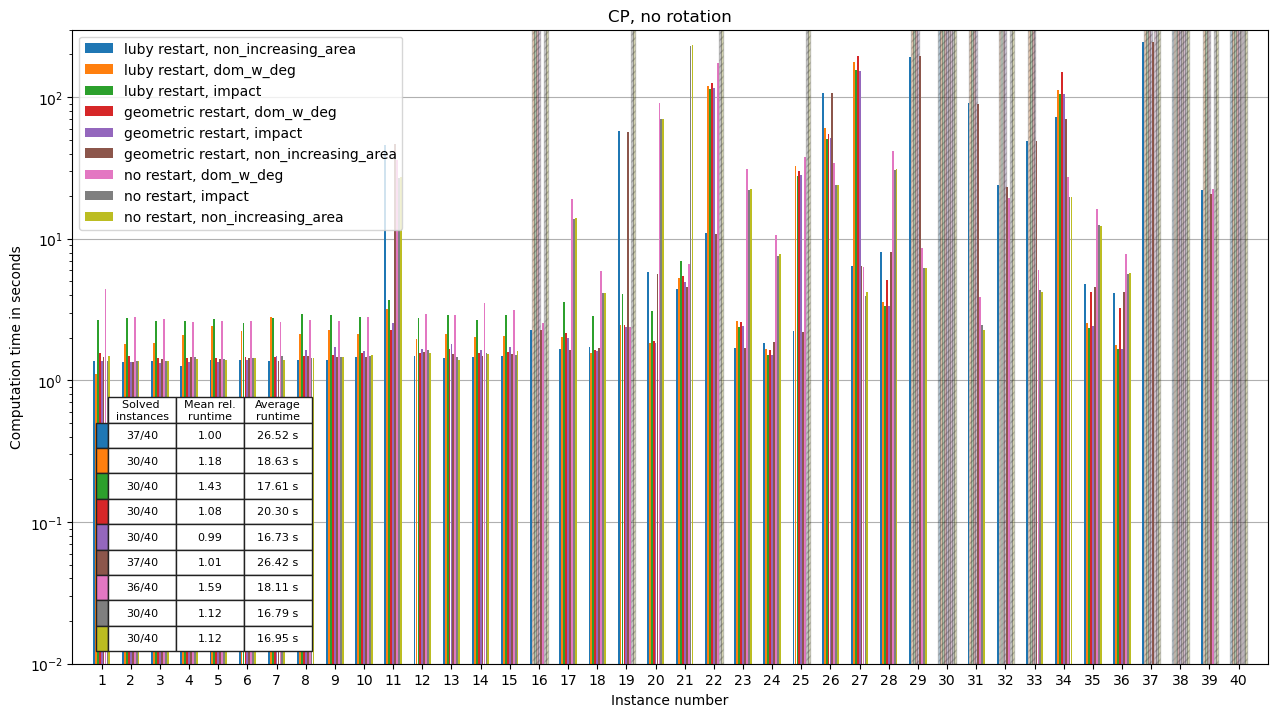

In [2]:
# 1 dom_w_deg, 2 impact, 3 input_order
# 1 luby, 2 geometric, 3 none
d11 = get_execution_times("CP/out/no_rotation/luby/dom_w_deg")
d21 = get_execution_times("CP/out/no_rotation/luby/impact")
d31 = get_execution_times("CP/out/no_rotation/luby/non_increasing_area")
d12 = get_execution_times("CP/out/no_rotation/geometric/dom_w_deg")
d22 = get_execution_times("CP/out/no_rotation/geometric/impact")
d32 = get_execution_times("CP/out/no_rotation/geometric/non_increasing_area")
d13 = get_execution_times("CP/out/no_rotation/no_restart/dom_w_deg")
d23 = get_execution_times("CP/out/no_rotation/no_restart/impact")
d33 = get_execution_times("CP/out/no_rotation/no_restart/non_increasing_area")


fig, ax = visualize_execution_times(
    [d31, d11, d21, d12, d22, d32, d13, d23, d33],
    labels=['luby restart, non_increasing_area', 'luby restart, dom_w_deg', 'luby restart, impact',
            'geometric restart, dom_w_deg', 'geometric restart, impact', 'geometric restart, non_increasing_area',
            'no restart, dom_w_deg', 'no restart, impact', 'no restart, non_increasing_area'],
    first_is_baseline=True,
    title="CP, no rotation",
    stats_table_bbox=(0.03, 0.02, 0.17, 0.4))
if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'CP_no_rotation.' + f))
plt.show()


## Rotation

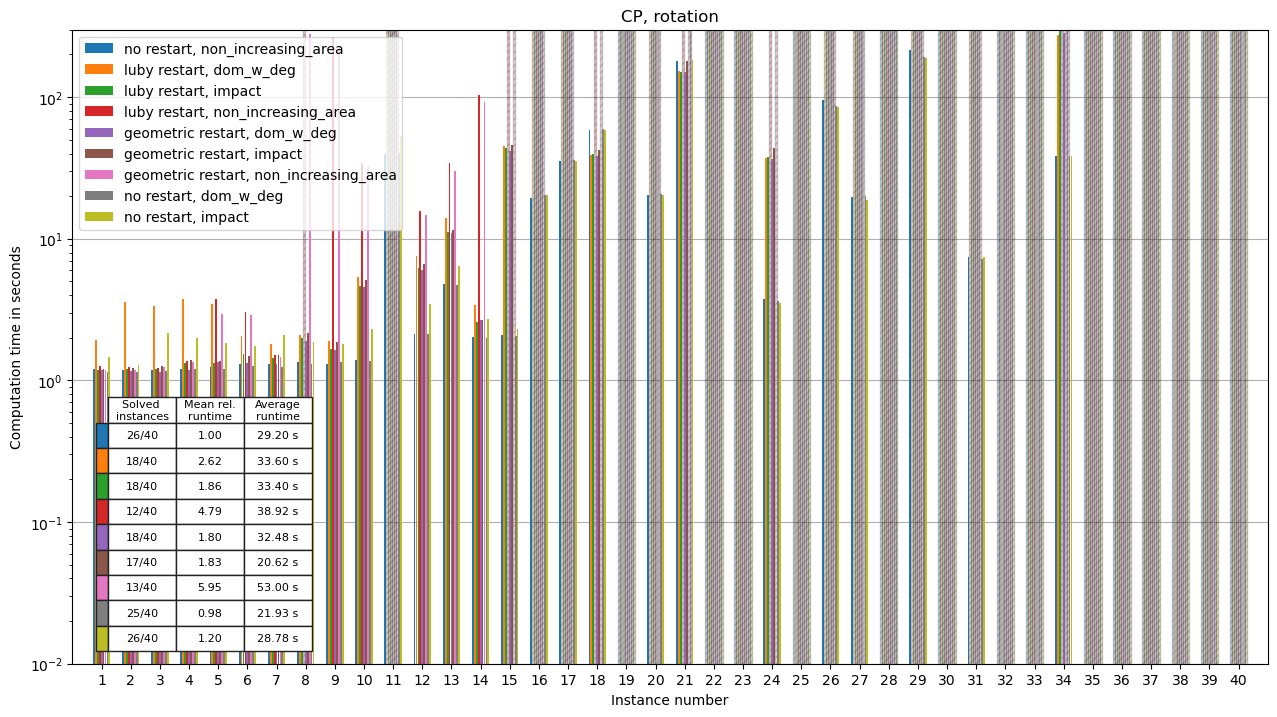

In [3]:
# 1 dom_w_deg, 2 impact, 3 input_order
# 1 luby, 2 geometric, 3 none
d11r = get_execution_times("CP/out/rotation/luby/dom_w_deg")
d21r = get_execution_times("CP/out/rotation/luby/impact")
d31r = get_execution_times("CP/out/rotation/luby/non_increasing_area")
d12r = get_execution_times("CP/out/rotation/geometric/dom_w_deg")
d22r = get_execution_times("CP/out/rotation/geometric/impact")
d32r = get_execution_times("CP/out/rotation/geometric/non_increasing_area")
d13r = get_execution_times("CP/out/rotation/no_restart/dom_w_deg")
d23r = get_execution_times("CP/out/rotation/no_restart/impact")
d33r = get_execution_times("CP/out/rotation/no_restart/non_increasing_area")


fig, ax = visualize_execution_times(
    [d33r, d11r, d21r, d31r, d12r, d22r, d32r, d13r, d23r],
    labels=['no restart, non_increasing_area', 'luby restart, dom_w_deg', 'luby restart, impact', 'luby restart, non_increasing_area',
            'geometric restart, dom_w_deg', 'geometric restart, impact', 'geometric restart, non_increasing_area',
            'no restart, dom_w_deg', 'no restart, impact'],
    first_is_baseline=True,
    title="CP, rotation",
    stats_table_bbox=(0.03, 0.02, 0.17, 0.4))
if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'CP_rotation.' + f))
plt.show()

## Both

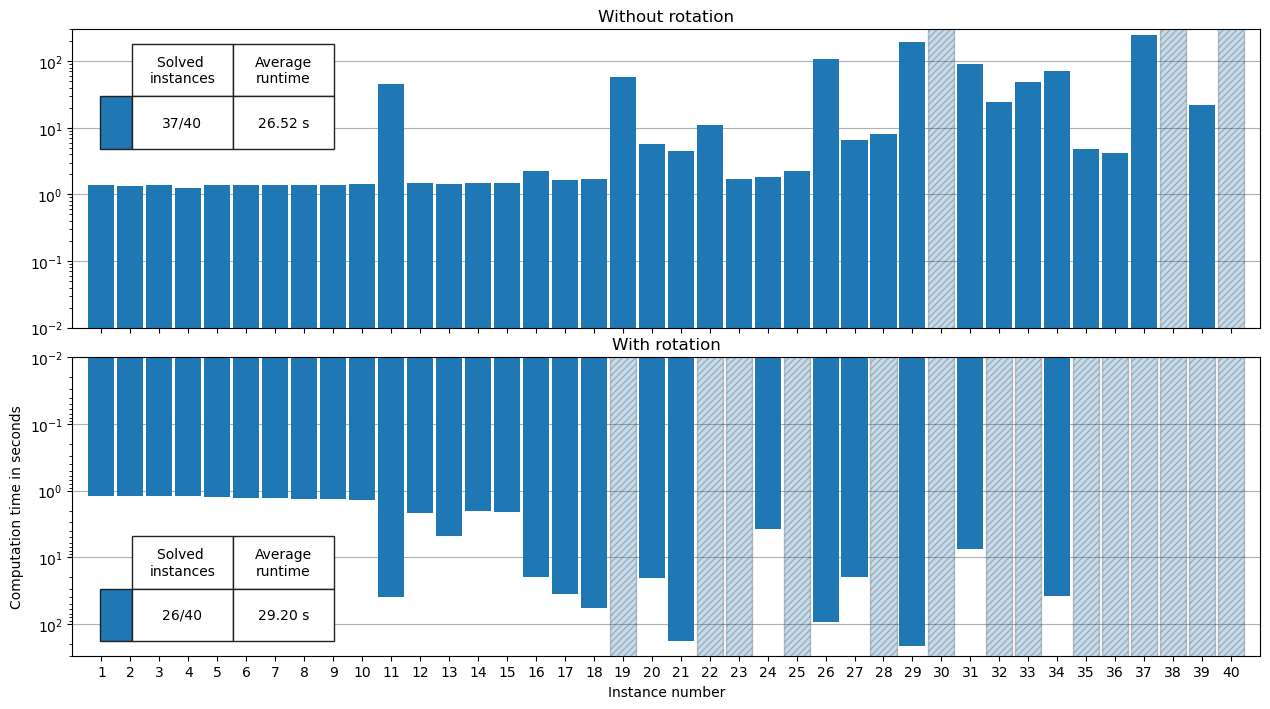

In [4]:
kw_upper = {'title': 'Without rotation'}
kw_lower = {'title': 'With rotation'}

fig, ax = visualize_execution_times_two_plots((d31,), (d33r,), kw_upper=kw_upper, kw_lower=kw_lower)
if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'CP_Comparison.' + f))
plt.show()


# SAT
performance analysis of the strip packing problem using SAT

In [5]:
t_SAT_nr_base = get_execution_times("SAT/out/no_rotation/no_symmetry_breaking/no_sorting_by_area/")
t_SAT_nr_sb = get_execution_times("SAT/out/no_rotation/symmetry_breaking/no_sorting_by_area/")
t_SAT_nr_sbsa = get_execution_times("SAT/out/no_rotation/symmetry_breaking/sorting_by_area/")

t_SAT_r_base = get_execution_times("SAT/out/rotation/no_symmetry_breaking/no_sorting_by_area/")
t_SAT_r_sb = get_execution_times("SAT/out/rotation/symmetry_breaking/no_sorting_by_area/")
t_SAT_r_sbsa = get_execution_times("SAT/out/rotation/symmetry_breaking/sorting_by_area/")

labels = ["Baseline", "Symmetry breaking", "Symmetry breaking and preprocessing"]

#SAT_colors = ["#17becf", "#1f77b4", "#083570", "#50ca50", "#008000", "#004500"]
SAT_colors = ["#c44e52", "#83a83b", "#3572c6", "#c44e52", "#83a83b", "#3572c6"]
def get_SAT_colors(*id):
    return [SAT_colors[i-1] for i in id]

## No rotation

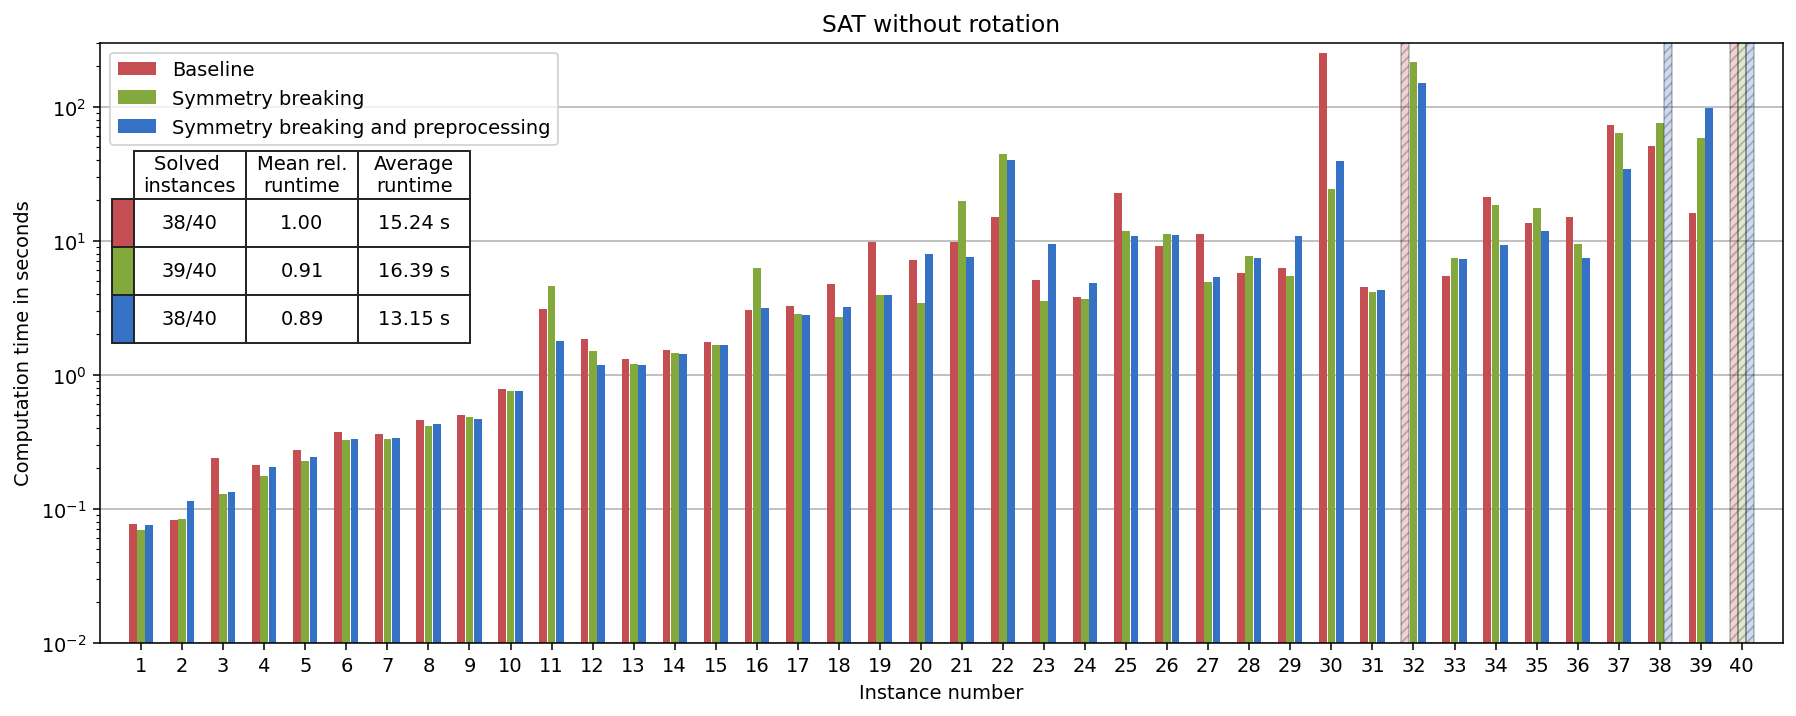

In [6]:
bar_colors = get_SAT_colors(1, 2, 3)
title = "SAT without rotation"

fig, ax = visualize_execution_times((t_SAT_nr_base, t_SAT_nr_sb, t_SAT_nr_sbsa), labels, title = title, bar_colors=bar_colors, **time_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SAT_no_rotation.' + f))
plt.show()

## Rotation

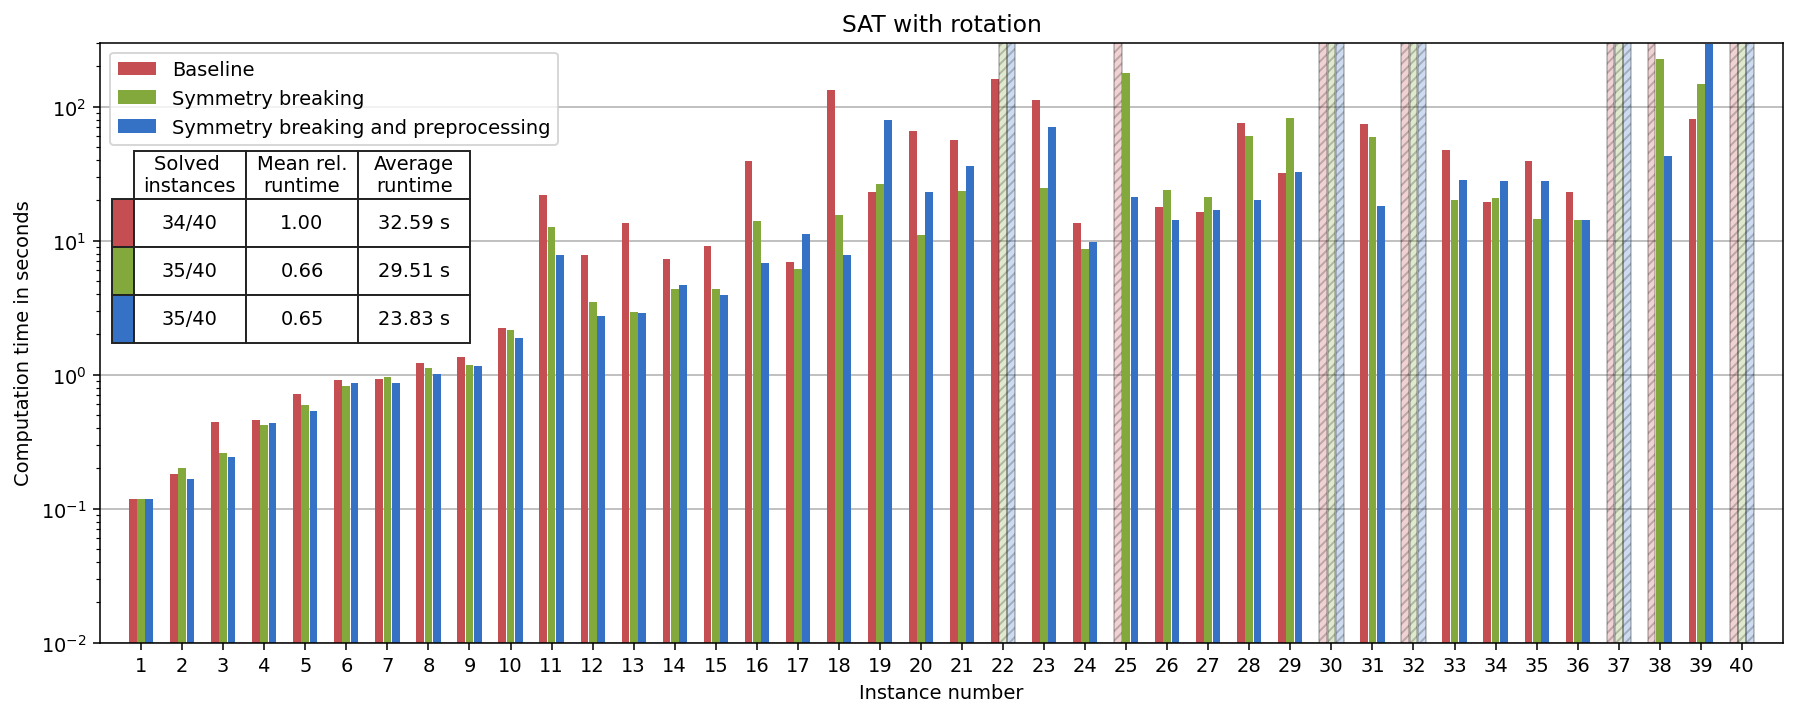

In [7]:
bar_colors = get_SAT_colors(4, 5, 6)
title = "SAT with rotation"

fig, ax = visualize_execution_times((t_SAT_r_base, t_SAT_r_sb, t_SAT_r_sbsa), labels, title = title, bar_colors=bar_colors, **time_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SAT_rotation.' + f))
plt.show()

## Both

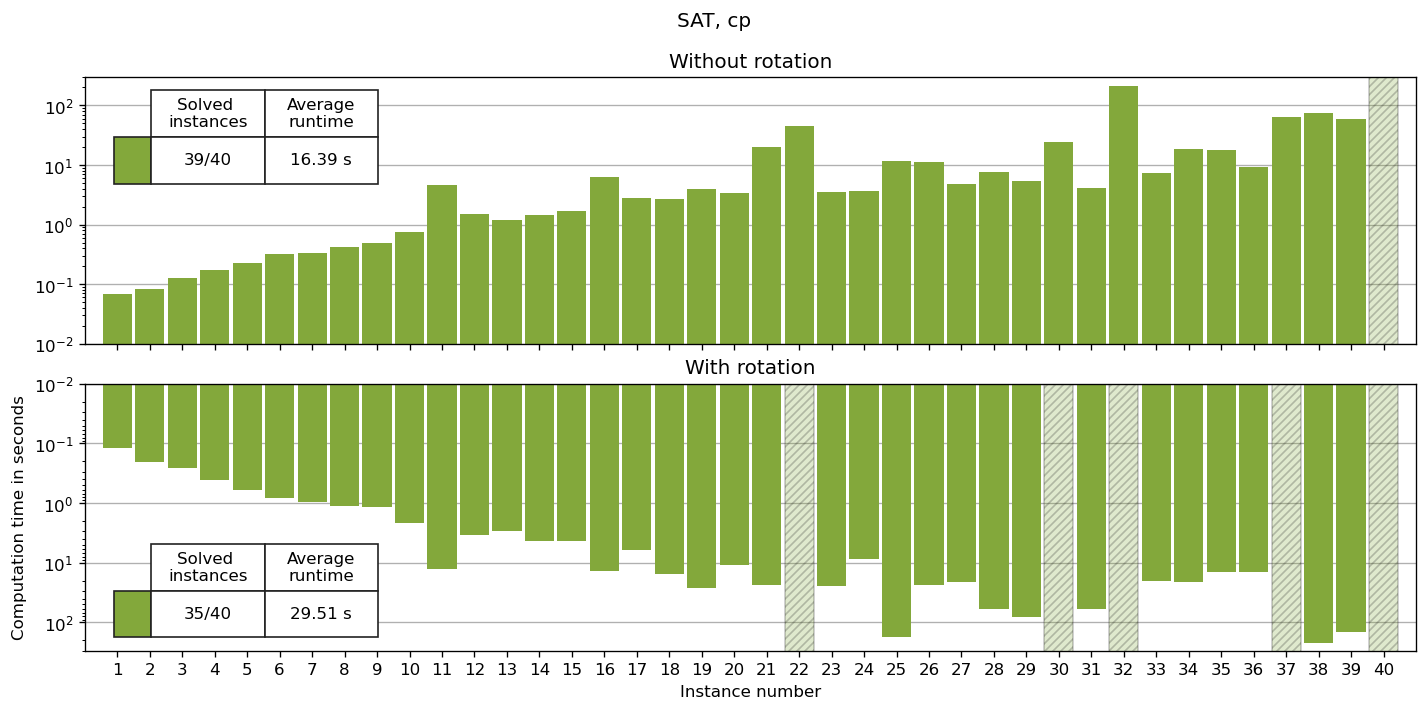

In [18]:
bar_colors = get_SAT_colors(2, 5)

kw_upper = {'title': 'Without rotation', 'bar_colors': [bar_colors[0]]}
kw_lower = {'title': 'With rotation', 'bar_colors': [bar_colors[1]]}
fig, axs = visualize_execution_times_two_plots((t_SAT_nr_sb, ), (t_SAT_r_sb, ), kw_upper=kw_upper, kw_lower=kw_lower, suptitle = "SAT, " + labels[1].lower(), **comp_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SAT_comparison_imp.' + f))
plt.show()

# SMT
performance analysis of the strip packing problem using SMT

In [9]:
t_SMT_nr_base = get_execution_times("SMT/out/no_rotation/no_symmetry_breaking/no_sorting_by_area/")
t_SMT_nr_sb = get_execution_times("SMT/out/no_rotation/symmetry_breaking/no_sorting_by_area/")
t_SMT_nr_sbsa = get_execution_times("SMT/out/no_rotation/symmetry_breaking/sorting_by_area/")

t_SMT_r_base = get_execution_times("SMT/out/rotation/no_symmetry_breaking/no_sorting_by_area/")
t_SMT_r_sb = get_execution_times("SMT/out/rotation/symmetry_breaking/no_sorting_by_area/")
t_SMT_r_sbsa = get_execution_times("SMT/out/rotation/symmetry_breaking/sorting_by_area/")

labels = ["Baseline", "Symmetry breaking", "Symmetry breaking and preprocessing"]

#SMT_colors = ["#ffb600", "#cc650b", "#854215", "#ff5656", "#980000", "#600000"]
SMT_colors = ["#c44e52", "#83a83b", "#3572c6", "#c44e52", "#83a83b", "#3572c6"]
def get_SMT_colors(*id):
    return [SMT_colors[i-1] for i in id]

## No Rotation

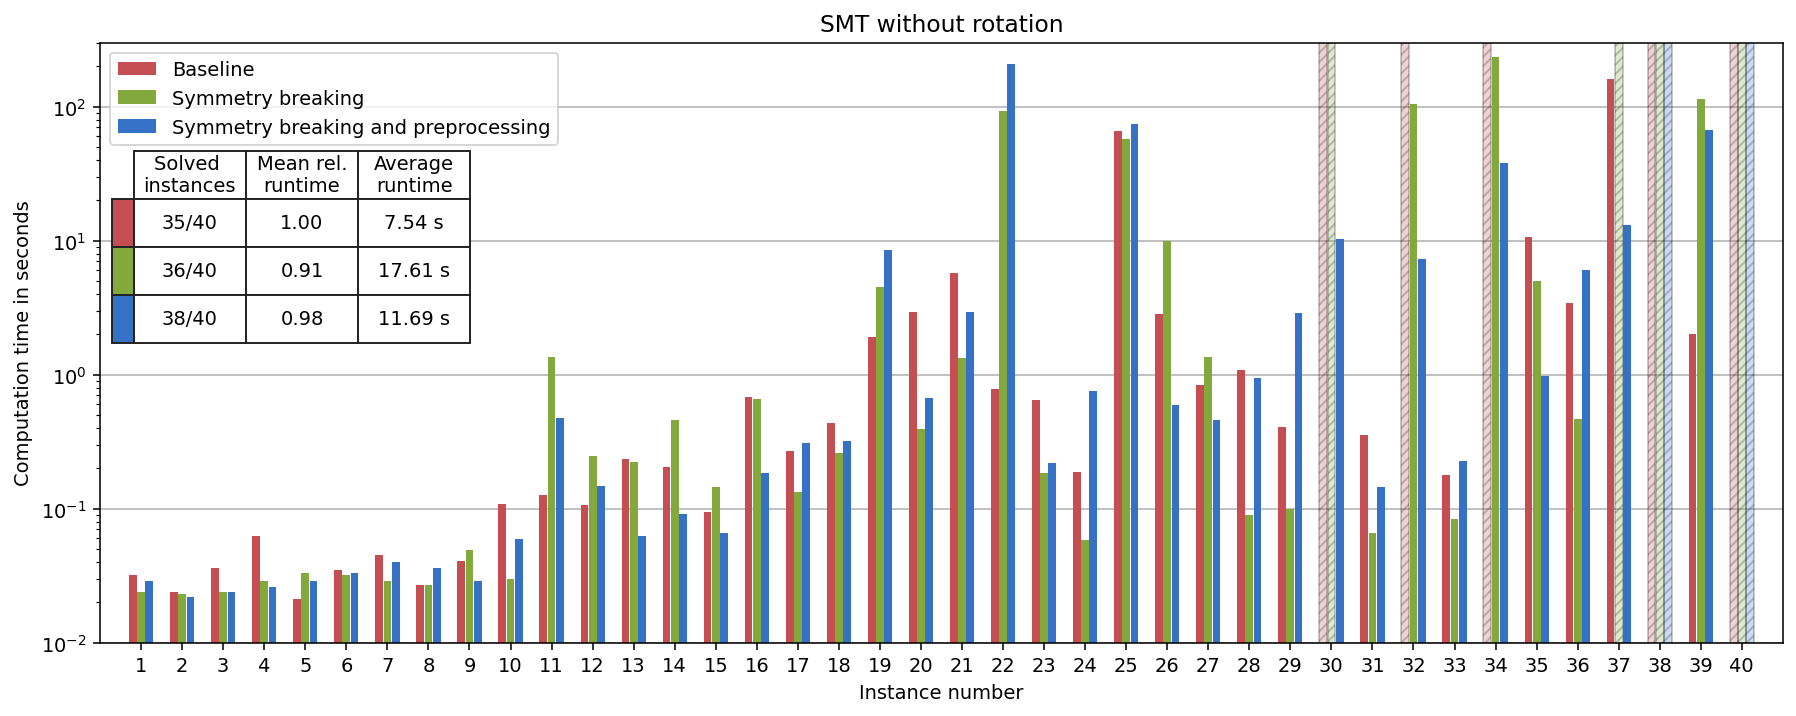

In [10]:
bar_colors = get_SMT_colors(1, 2, 3)
title = "SMT without rotation"

fig, ax = visualize_execution_times((t_SMT_nr_base, t_SMT_nr_sb, t_SMT_nr_sbsa), labels, title = title, bar_colors=bar_colors, **time_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SMT_no_rotation.' + f))
plt.show()

## Rotation

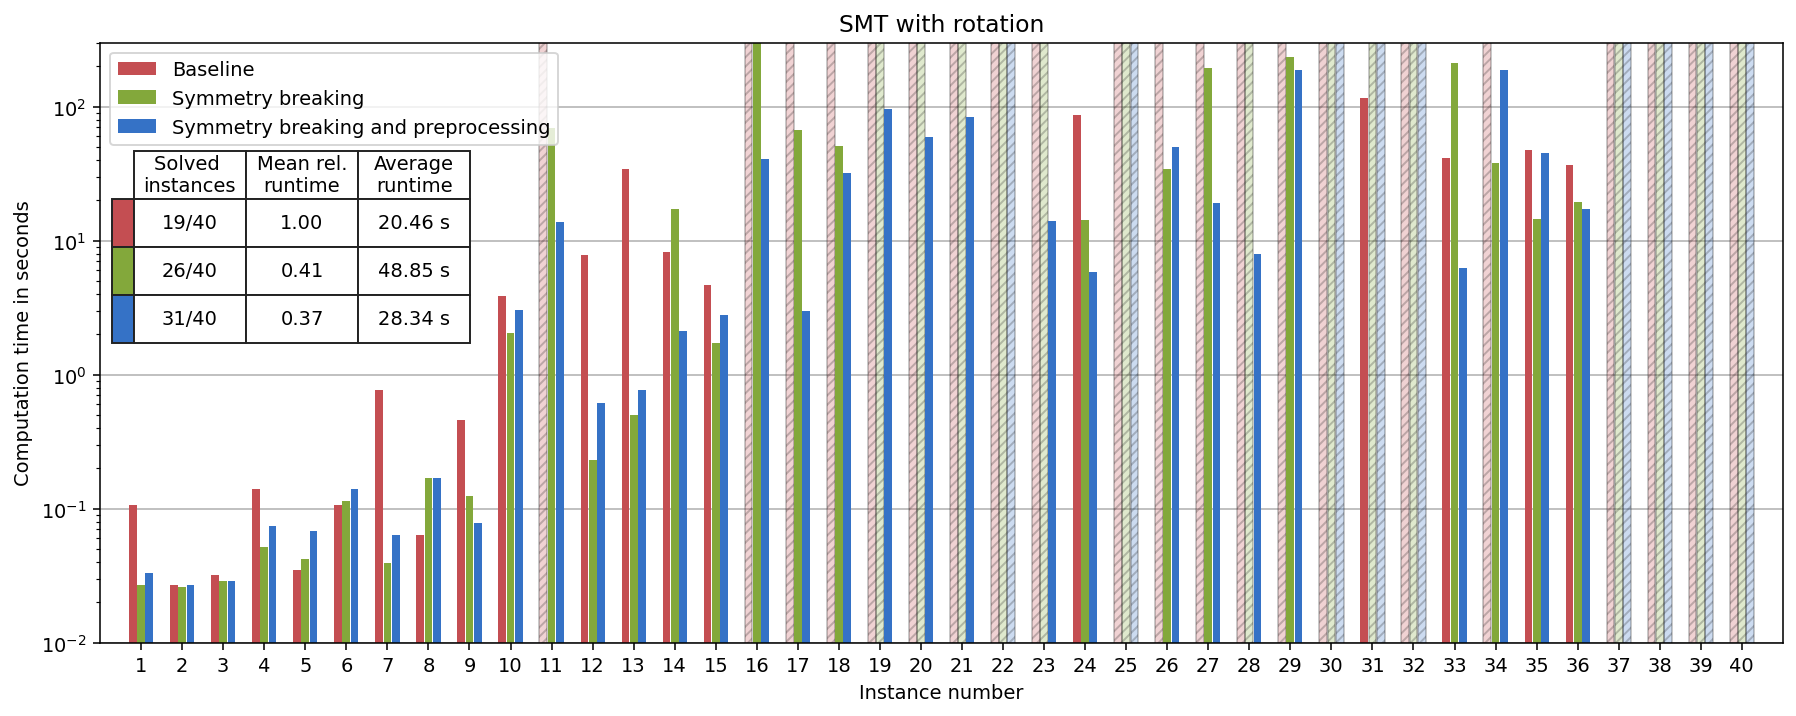

In [11]:
bar_colors = get_SMT_colors(4, 5, 6)
title = "SMT with rotation"

fig, ax = visualize_execution_times((t_SMT_r_base, t_SMT_r_sb, t_SMT_r_sbsa), labels, title = title, bar_colors=bar_colors, **time_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SMT_rotation.' + f))
plt.show()

## Both

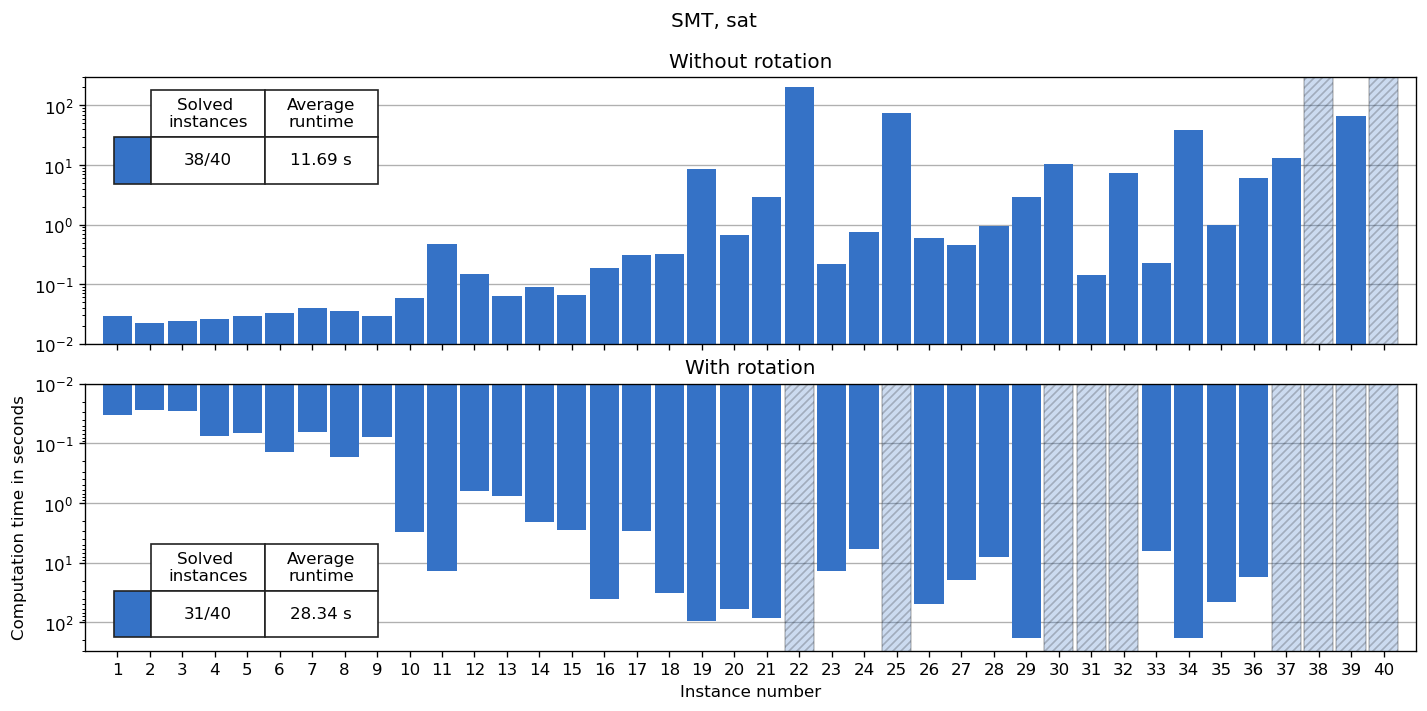

In [19]:
bar_colors = get_SMT_colors(3, 6)

kw_upper = {'title': 'Without rotation', 'bar_colors': [bar_colors[0]]}
kw_lower = {'title': 'With rotation', 'bar_colors': [bar_colors[1]]}
fig, axs = visualize_execution_times_two_plots((t_SMT_nr_sbsa, ), (t_SMT_r_sbsa, ), kw_upper=kw_upper, kw_lower=kw_lower, suptitle = "SMT, " + labels[2].lower(), **comp_plot_kw)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'SMT_comparison_imp2.' + f))
plt.show()

# LP
performance analysis of the strip packing problem using Linear Programming

## No Rotation

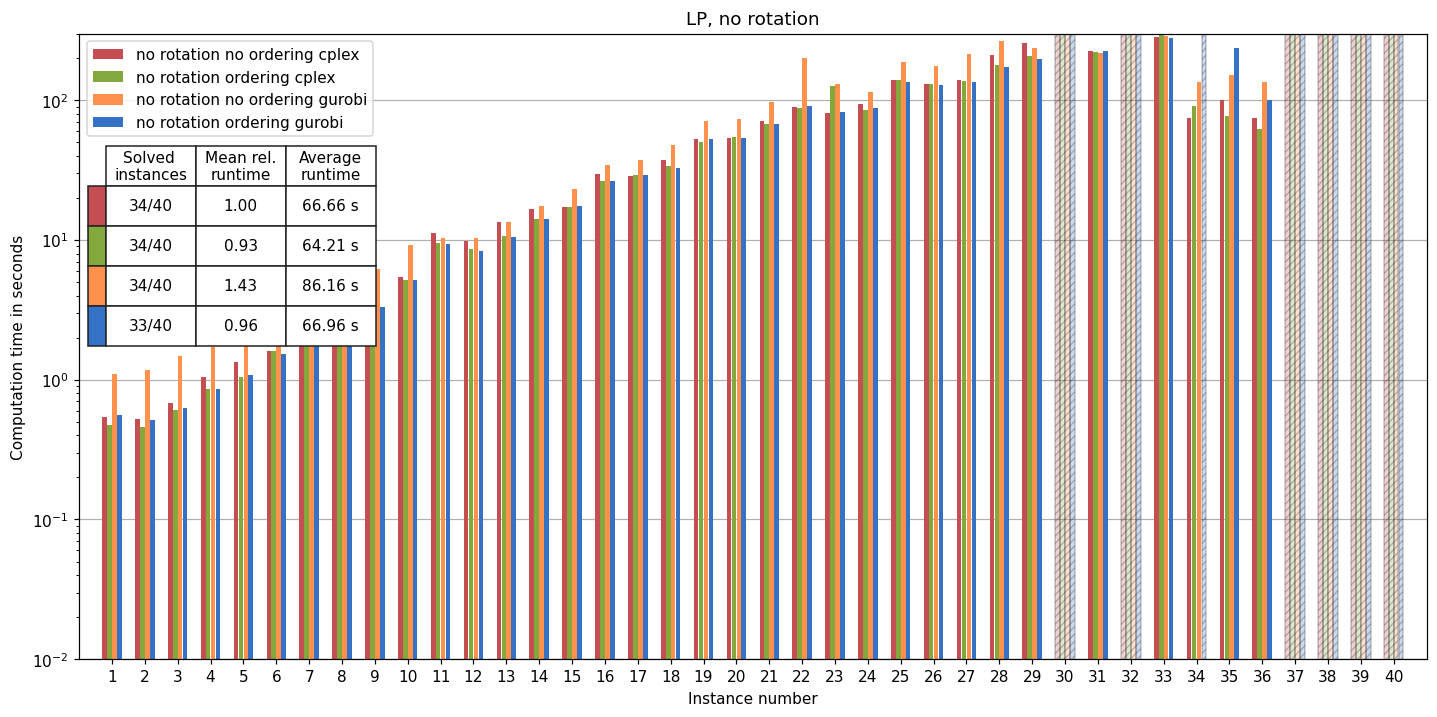

In [13]:
d1 = get_execution_times("LP/out/no_rotation/no_ordering/cplex")
d2 = get_execution_times("LP/out/no_rotation/ordering/cplex")
d3 = get_execution_times("LP/out/no_rotation/no_ordering/gurobi")
d4 = get_execution_times("LP/out/no_rotation/ordering/gurobi")
LP_colors = ["#c44e52", "#83a83b", "#ff914d", "#3572c6"]
labels = ["no rotation no ordering cplex", "no rotation ordering cplex",
          "no rotation no ordering gurobi", "no rotation ordering gurobi"]

fig, ax = visualize_execution_times((d1, d2, d3, d4), title="LP, no rotation",  bar_colors=LP_colors, **LP_plot_kw, labels=labels, aspect=2)
if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'LP_no_rotation.' + f))
plt.show()


## Rotation

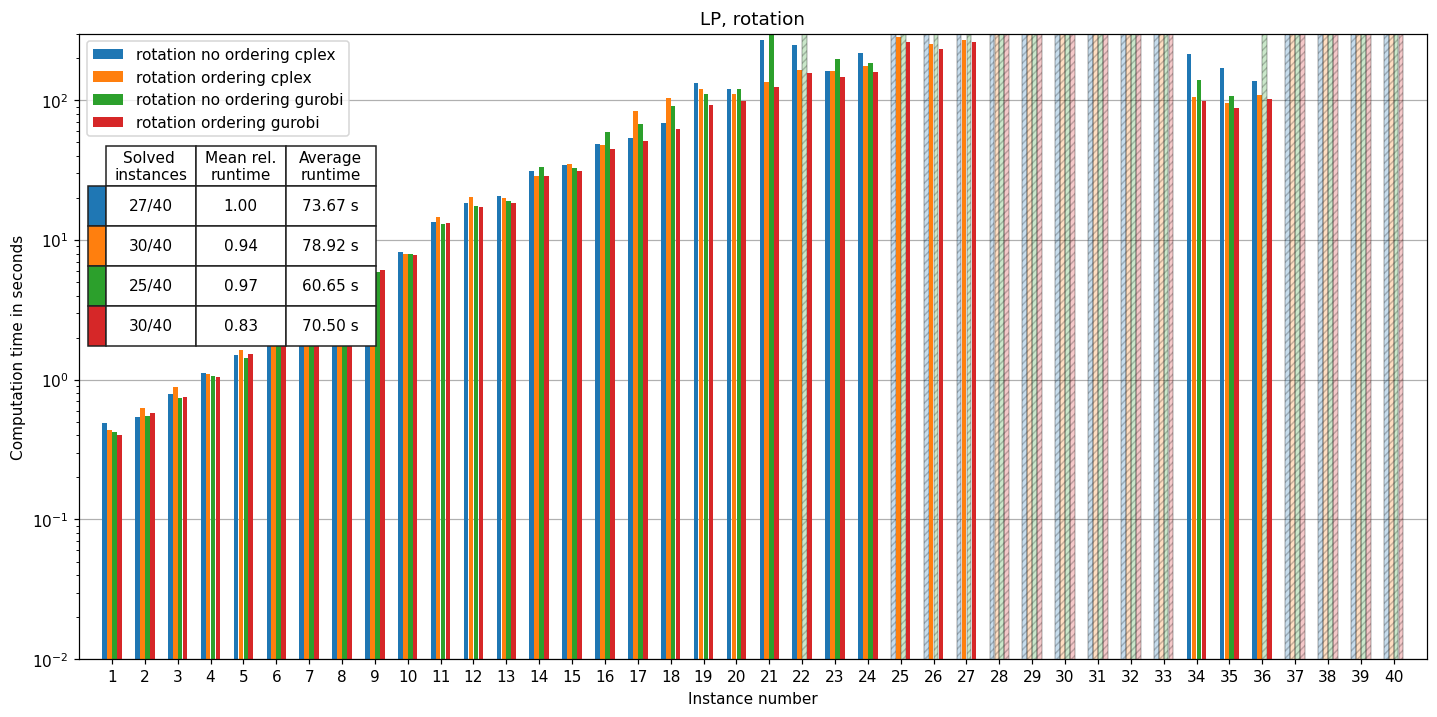

In [14]:
d1r = get_execution_times("LP/out/rotation/no_ordering/cplex")
d2r = get_execution_times("LP/out/rotation/ordering/cplex")
d3r = get_execution_times("LP/out/rotation/no_ordering/gurobi")
d4r = get_execution_times("LP/out/rotation/ordering/gurobi")
LP_colors = ["#c44e52", "#83a83b", "#ff914d", "#3572c6"]

labels = ["rotation no ordering cplex", "rotation ordering cplex",
          "rotation no ordering gurobi", "rotation ordering gurobi"]

fig, ax = visualize_execution_times((d1r, d2r, d3r, d4r), title="LP, rotation",  **LP_plot_kw, labels=labels, aspect=2)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'LP_rotation.' + f))
plt.show()

## Both

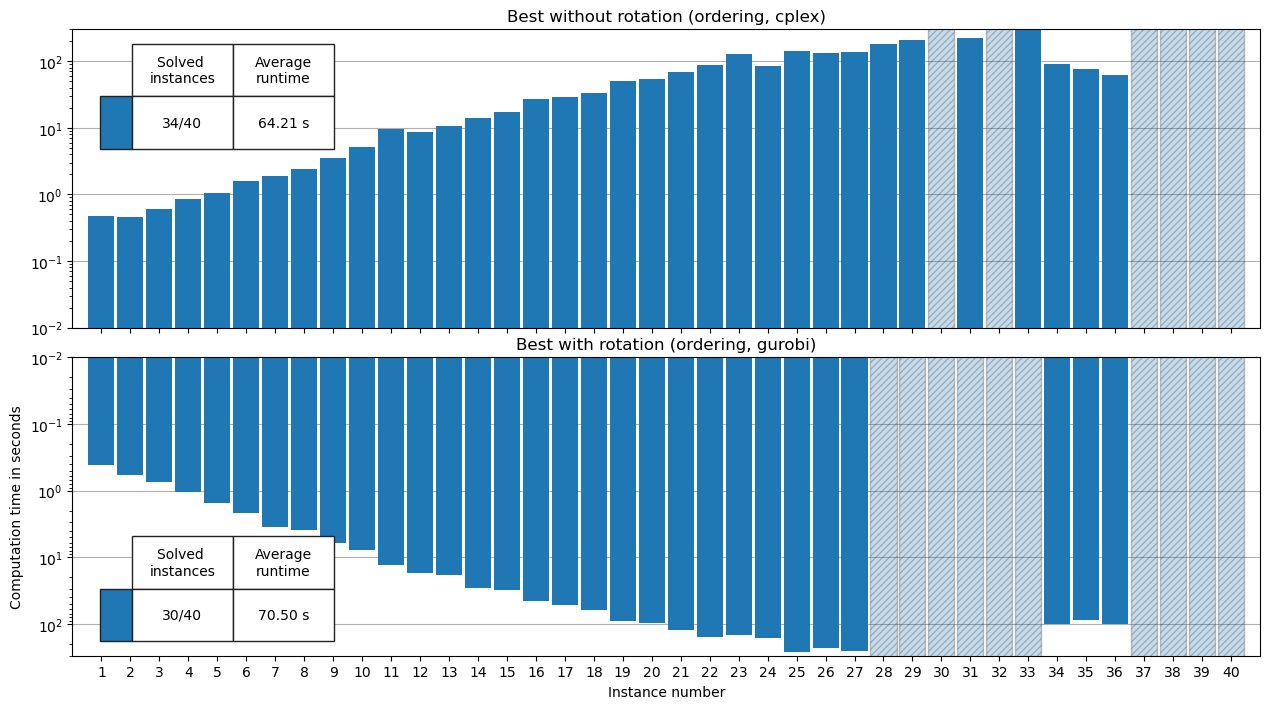

In [15]:
kw_upper = {'title': 'Best without rotation (ordering, cplex)'}
kw_lower = {'title': 'Best with rotation (ordering, gurobi)'}

fig, ax = visualize_execution_times_two_plots((d2,), (d4r,), kw_upper=kw_upper, kw_lower=kw_lower)
if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'LP_Comparison.' + f))
plt.show()


# Final Comparison

## No Rotation

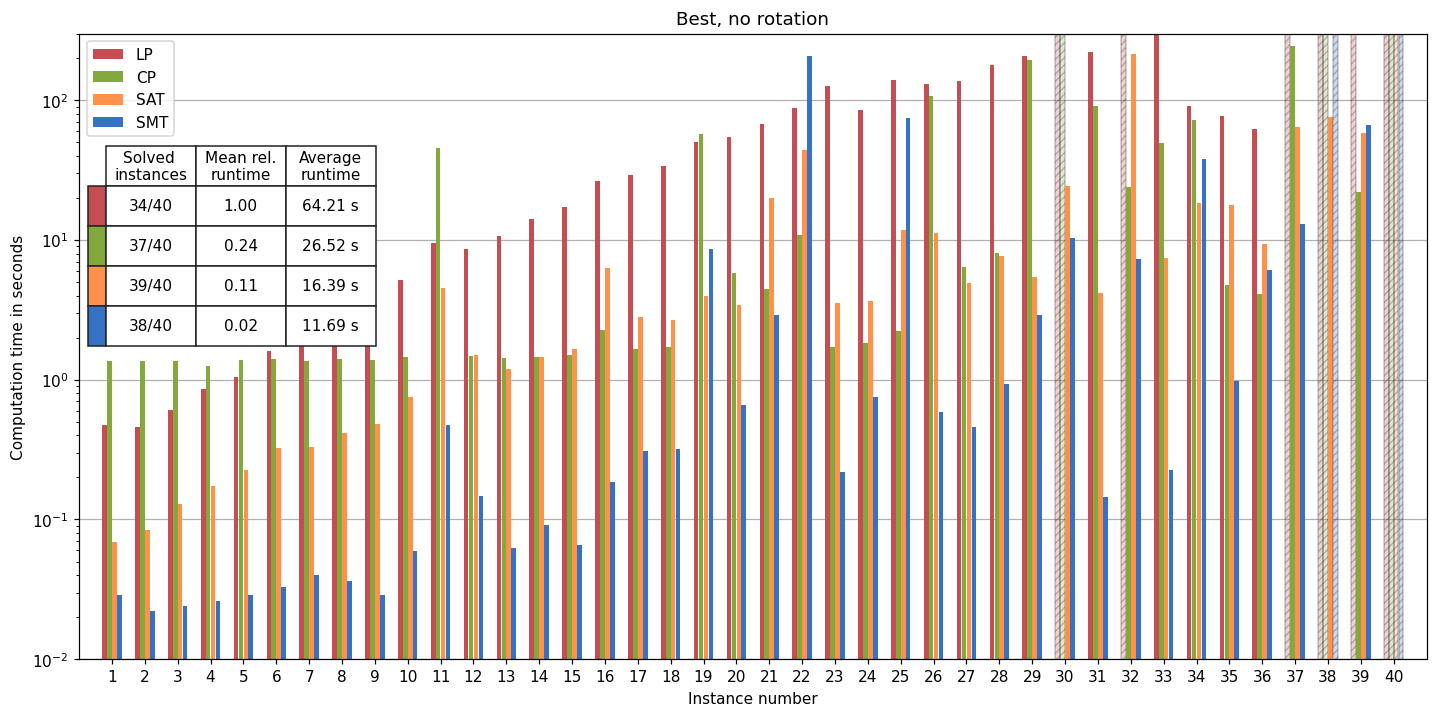

In [22]:
d1 = get_execution_times("CP/out/no_rotation/luby/non_increasing_area")
d2 = get_execution_times("SAT/out/no_rotation/symmetry_breaking/no_sorting_by_area/")
d3 = get_execution_times("SMT/out/no_rotation/symmetry_breaking/sorting_by_area/")
d4 = get_execution_times("LP/out/no_rotation/ordering/cplex")

colors = ["#c44e52", "#83a83b", "#ff914d", "#3572c6"]
labels = ["LP", "CP", "SAT", "SMT"]

fig, ax = visualize_execution_times((d4, d1, d2, d3), title="Best, no rotation",  bar_colors=colors, **LP_plot_kw, labels=labels, aspect=2)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'ALL_no_rotation.' + f))
plt.show()


## Rotation

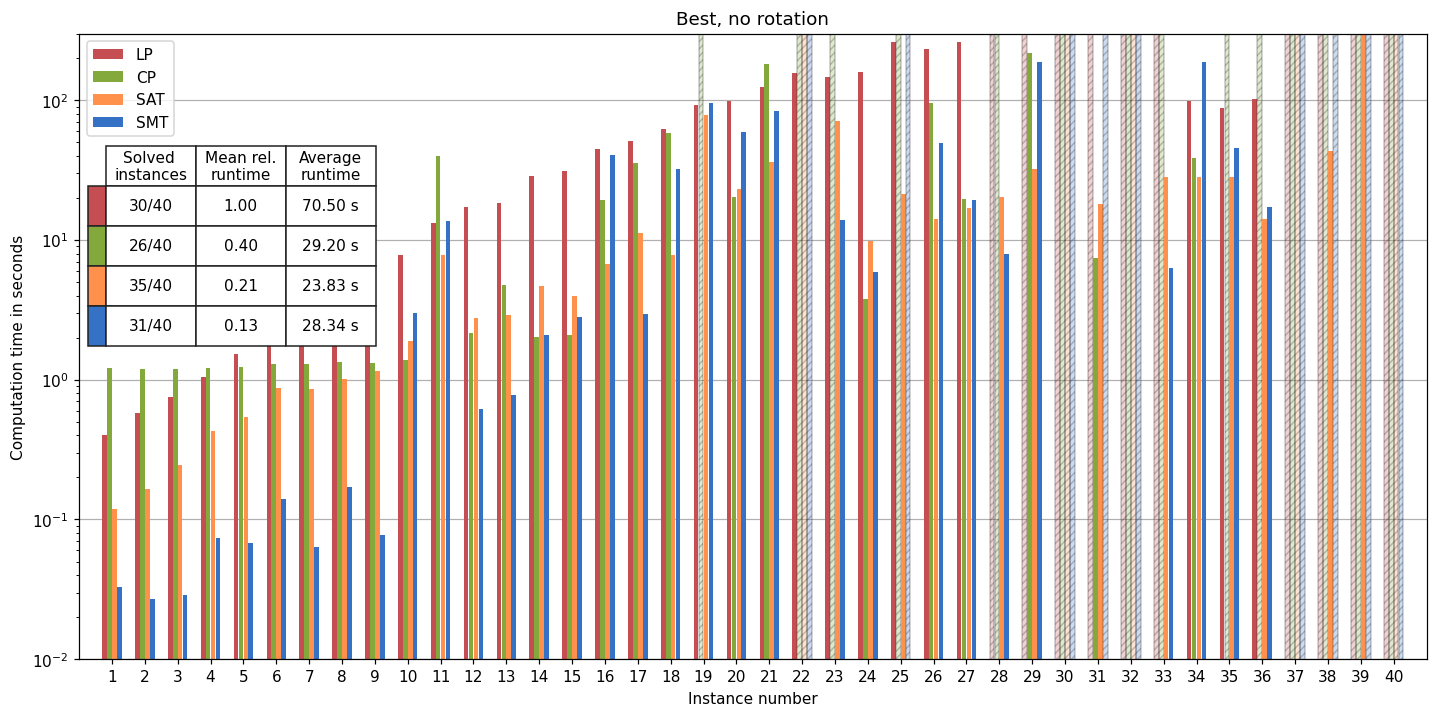

In [21]:
d1 = get_execution_times("CP/out/rotation/no_restart/non_increasing_area")
d2 = get_execution_times("SAT/out/rotation/symmetry_breaking/sorting_by_area/")
d3 = get_execution_times("SMT/out/rotation/symmetry_breaking/sorting_by_area/")
d4 = get_execution_times("LP/out/rotation/ordering/gurobi")

colors = ["#c44e52", "#83a83b", "#ff914d", "#3572c6"]
labels = ["LP", "CP", "SAT", "SMT"]

fig, ax = visualize_execution_times((d4, d1, d2, d3), title="Best, no rotation",  bar_colors=colors, **LP_plot_kw, labels=labels, aspect=2)

if save_figures:
    for f in plot_formats:
        fig.savefig(os.path.join(plot_folder, 'ALL_rotation.' + f))
plt.show()
